In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
from pyfinance.ols import PandasRollingOLS

In [4]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [5]:
DATA_STORE = 'C:/Users/86155/Machine Learning for Algorithmic Trading/data/assets.h5'

In [6]:
START = 2000
END = 2018

In [7]:
with pd.HDFStore(DATA_STORE) as store:
    prices = (store['quandl/wiki/prices']
              .loc[idx[str(START):str(END), :], 'adj_close']
              .unstack('ticker'))
    stocks = store['us_equities/stocks'].loc[:, ['marketcap', 'ipoyear', 'sector']]

In [8]:
prices

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZIOP,ZIXI,ZLC,ZLTQ,ZMH,ZNGA,ZOES,ZQK,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,49.121329,NaN,NaN,NaN,4.975857,NaN,1.025920,NaN,3.596463,NaN,...,NaN,37.06,23.5,NaN,NaN,NaN,NaN,3.7025,NaN,NaN
2000-01-04,45.369006,NaN,NaN,NaN,4.958913,NaN,1.068476,NaN,3.293170,NaN,...,NaN,36.50,22.5,NaN,NaN,NaN,NaN,3.5475,NaN,NaN
2000-01-05,41.998737,NaN,NaN,NaN,4.958913,NaN,1.073796,NaN,3.341362,NaN,...,NaN,37.13,23.0,NaN,NaN,NaN,NaN,3.4850,NaN,NaN
2000-01-06,40.934441,NaN,NaN,NaN,4.958913,NaN,1.082915,NaN,3.052206,NaN,...,NaN,35.25,22.0,NaN,NaN,NaN,NaN,3.4850,NaN,NaN
2000-01-07,44.345645,NaN,NaN,NaN,4.958913,NaN,1.044918,NaN,3.196784,NaN,...,NaN,38.00,21.5,NaN,NaN,NaN,NaN,3.4850,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,69.400000,47.95,54.09,60.80,47.370000,26.71,39.050000,115.24,171.270000,32.46,...,4.28,4.53,NaN,NaN,NaN,3.94,15.66,NaN,84.10,23.95
2018-03-22,67.470000,44.92,52.31,60.18,45.940000,25.96,38.550000,111.71,168.845000,32.52,...,4.19,4.52,NaN,NaN,NaN,3.81,15.27,NaN,82.06,23.35
2018-03-23,66.060000,44.71,51.01,58.35,45.300000,25.36,37.200000,110.84,164.940000,31.78,...,4.05,4.40,NaN,NaN,NaN,3.80,15.12,NaN,80.60,23.55


In [9]:
stocks

,marketcap,ipoyear,sector
ticker,,,
PIH,4.309000e+07,2014.0,Finance
PIHPP,NaN,NaN,Finance
TURN,7.033000e+07,NaN,Finance
FLWS,8.333900e+08,1999.0,Consumer Services
FCCY,1.781400e+08,NaN,Finance
...,...,...,...
ZOES,1.974000e+08,2014.0,Consumer Services
ZTS,4.165000e+10,2013.0,Health Care
ZTO,1.434000e+10,2016.0,Transportation


In [10]:
stocks = stocks[~stocks.index.duplicated()]
stocks.index.name = 'ticker'

In [11]:
shared = prices.columns.intersection(stocks.index)

In [12]:
stocks = stocks.loc[shared,:]
prices = prices.loc[:,shared]

In [13]:
prices

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,49.121329,NaN,NaN,NaN,4.975857,NaN,1.025920,NaN,3.596463,NaN,...,NaN,4.466544,NaN,43.826745,NaN,37.06,NaN,NaN,NaN,NaN
2000-01-04,45.369006,NaN,NaN,NaN,4.958913,NaN,1.068476,NaN,3.293170,NaN,...,NaN,4.466544,NaN,41.702530,NaN,36.50,NaN,NaN,NaN,NaN
2000-01-05,41.998737,NaN,NaN,NaN,4.958913,NaN,1.073796,NaN,3.341362,NaN,...,NaN,4.408079,NaN,41.899948,NaN,37.13,NaN,NaN,NaN,NaN
2000-01-06,40.934441,NaN,NaN,NaN,4.958913,NaN,1.082915,NaN,3.052206,NaN,...,NaN,4.350542,NaN,42.247403,NaN,35.25,NaN,NaN,NaN,NaN
2000-01-07,44.345645,NaN,NaN,NaN,4.958913,NaN,1.044918,NaN,3.196784,NaN,...,NaN,4.640083,NaN,42.350060,NaN,38.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,69.400000,47.95,54.09,60.80,47.370000,26.71,39.050000,115.24,171.270000,32.46,...,48.89,22.120000,42.10,55.100000,4.28,4.53,3.94,15.66,84.10,23.95
2018-03-22,67.470000,44.92,52.31,60.18,45.940000,25.96,38.550000,111.71,168.845000,32.52,...,48.12,20.650000,41.05,53.070000,4.19,4.52,3.81,15.27,82.06,23.35
2018-03-23,66.060000,44.71,51.01,58.35,45.300000,25.36,37.200000,110.84,164.940000,31.78,...,46.70,20.000000,40.35,51.230000,4.05,4.40,3.80,15.12,80.60,23.55


In [14]:
assert prices.shape[1] == stocks.shape[0]

In [15]:
monthly_prices = prices.resample('M').last()

In [16]:
monthly_prices

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,45.157511,NaN,NaN,NaN,4.766882,NaN,1.211345,NaN,3.333330,NaN,...,NaN,4.176075,NaN,46.927728,NaN,30.88,NaN,NaN,NaN,NaN
2000-02-29,70.884807,NaN,NaN,NaN,4.941969,NaN,1.296459,NaN,3.682567,NaN,...,NaN,4.176075,NaN,42.110354,NaN,53.78,NaN,NaN,NaN,NaN
2000-03-31,70.953031,NaN,NaN,NaN,4.834658,NaN,1.334456,NaN,4.363369,NaN,...,NaN,3.712067,NaN,33.039089,NaN,72.81,NaN,NaN,NaN,NaN
2000-04-30,60.466992,NaN,NaN,NaN,4.360229,NaN,1.595875,NaN,3.985860,NaN,...,NaN,4.408079,NaN,32.935916,NaN,36.94,NaN,NaN,NaN,NaN
2000-05-31,50.233382,NaN,NaN,NaN,4.312221,NaN,1.852735,NaN,2.698793,NaN,...,NaN,4.118538,NaN,36.732135,NaN,28.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-30,69.240000,41.51,50.49,72.0000,37.720000,43.66,36.450000,101.00,171.850000,39.36,...,33.61,19.920000,38.85,49.550000,4.570,4.40,4.100,15.98,72.29,21.800
2017-12-31,66.970000,53.87,52.03,81.6000,39.850000,37.82,36.700000,99.69,169.230000,38.24,...,33.84,21.490000,40.05,50.830000,4.140,4.38,4.000,16.72,72.04,20.825
2018-01-31,73.430000,52.02,54.32,69.0241,40.890000,32.39,36.400000,116.99,167.430000,35.26,...,38.52,23.310000,36.30,54.030000,3.945,4.23,3.585,14.72,76.73,20.750


In [17]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1, 2, 3, 6, 9, 12]

In [18]:
for lag in lags:
    data[f'return_{lag}m'] = (monthly_prices
                           .pct_change(lag)
                           .stack()
                           .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                  upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1)
                           )

In [19]:
data = data.swaplevel().dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 399525 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   return_1m   399525 non-null  float64
 1   return_2m   399525 non-null  float64
 2   return_3m   399525 non-null  float64
 3   return_6m   399525 non-null  float64
 4   return_9m   399525 non-null  float64
 5   return_12m  399525 non-null  float64
dtypes: float64(6)
memory usage: 19.9+ MB


In [20]:
data

,,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m
ticker,date,,,,,,
A,2001-01-31,-0.003653,0.022360,0.056104,0.049811,-0.052500,-0.015988
AAN,2001-01-31,0.116071,0.008439,-0.015687,-0.009856,-0.002912,-0.009572
AAON,2001-01-31,0.300170,0.034296,0.028670,-0.006238,0.010159,0.031027
AAPL,2001-01-31,0.430943,0.144685,0.033941,-0.132736,-0.110514,-0.070339
ABAX,2001-01-31,-0.073762,-0.042573,-0.044914,-0.003738,-0.028353,-0.031993
...,...,...,...,...,...,...,...
ZIXI,2018-03-31,0.083951,0.018737,0.000760,-0.017817,-0.028409,-0.007585
ZNGA,2018-03-31,0.069364,0.015912,-0.025652,-0.003559,0.001818,0.021989
ZOES,2018-03-31,0.000000,0.005420,-0.038117,0.027701,0.025046,-0.017982


In [21]:
min_obs = 120
nobs = data.groupby(level='ticker').size()
print(type(nobs))
keep = nobs[nobs>min_obs].index

<class 'pandas.core.series.Series'>


In [22]:
data = data.loc[idx[keep,:], :]
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
...                      ...        ...        ...        ...        ...   
ZUMZ   2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   
       2018-03-31   0.197970   0.066466   0.042579   0.045215   0.074606   

                   return_12m  
ticker date                    
A      2001-01-31   -0.015988  
       2001-02-28   -0.084537  
       2001-03-31   -0.096606  
       2001-04-30   -0.066102  
       2001-05-31   -0.063425  
...                       ...  
ZUMZ   2017-11-30   -0.010687  
       2017-12-31   -0.003996  
       2018-01-31    0.002864  
       2018-02-28   -0.002905  
       2018-03-31    0.021422  

[360752 rows x 6 columns]

In [23]:
data.describe()

,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m
count,360752.000000,360752.000000,360752.000000,360752.000000,360752.000000,360752.000000
mean,0.012255,0.009213,0.008181,0.007025,0.006552,0.006296
std,0.114236,0.081170,0.066584,0.048474,0.039897,0.034792
min,-0.329564,-0.255452,-0.214783,-0.162063,-0.131996,-0.114283
25%,-0.046464,-0.030716,-0.023961,-0.014922,-0.011182,-0.009064
50%,0.009448,0.009748,0.009744,0.009378,0.008982,0.008726
75%,0.066000,0.049249,0.042069,0.031971,0.027183,0.024615
max,0.430943,0.281819,0.221789,0.154555,0.124718,0.106371


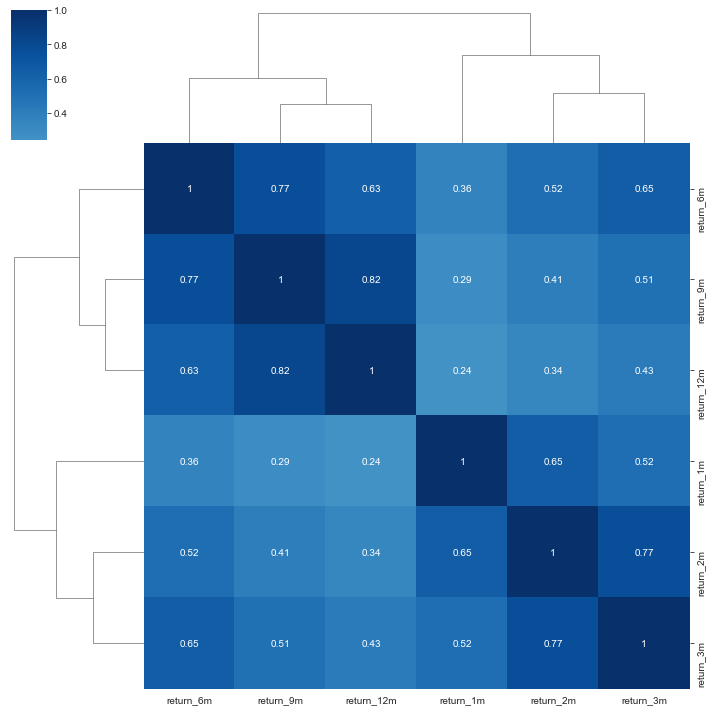

In [24]:
sns.clustermap(data.corr('spearman'), annot=True, center=0, cmap='Blues');

In [25]:
data.index.get_level_values('ticker').nunique()

1838

In [26]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2000')[0].drop('RF', axis=1)

In [27]:
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2000-01,-4.74,4.38,-1.75,-6.07,4.73
2000-02,2.45,18.08,-8.94,-18.48,-0.51
2000-03,5.20,-14.89,7.66,11.53,-1.05
2000-04,-6.40,-5.25,7.41,7.66,5.27
2000-05,-4.42,-4.11,5.01,4.36,0.74
...,...,...,...,...,...
2020-08,7.63,-0.94,-2.94,4.27,-1.44
2020-09,-3.63,0.07,-2.51,-1.15,-1.77
2020-10,-2.10,4.76,4.03,-0.60,-0.53


In [28]:
factor_data.index = factor_data.index.to_timestamp()

In [29]:
factor_data = factor_data.resample('M').last().div(100)

In [30]:
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2000-01-31,-0.0474,0.0438,-0.0175,-0.0607,0.0473
2000-02-29,0.0245,0.1808,-0.0894,-0.1848,-0.0051
2000-03-31,0.0520,-0.1489,0.0766,0.1153,-0.0105
2000-04-30,-0.0640,-0.0525,0.0741,0.0766,0.0527
2000-05-31,-0.0442,-0.0411,0.0501,0.0436,0.0074
...,...,...,...,...,...
2020-08-31,0.0763,-0.0094,-0.0294,0.0427,-0.0144
2020-09-30,-0.0363,0.0007,-0.0251,-0.0115,-0.0177
2020-10-31,-0.0210,0.0476,0.0403,-0.0060,-0.0053


In [31]:
factor_data.index.name = 'date'

In [32]:
factor_data = factor_data.join(data['return_1m']).sort_index()

In [33]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
ticker date                                                         
A      2001-01-31  0.0313  0.0578 -0.0533 -0.0531 -0.0655  -0.003653
       2001-02-28 -0.1005  0.0263  0.1258  0.0909  0.0956  -0.329564
       2001-03-31 -0.0726  0.0227  0.0652  0.0327  0.0394  -0.146389
       2001-04-30  0.0794 -0.0066 -0.0480 -0.0342 -0.0395   0.269444
       2001-05-31  0.0072  0.0356  0.0334  0.0017  0.0218  -0.140220
...                   ...     ...     ...     ...     ...        ...
ZUMZ   2017-11-30  0.0312 -0.0033 -0.0009  0.0330  0.0005   0.235127
       2017-12-31  0.0106 -0.0102  0.0017  0.0072  0.0167  -0.044725
       2018-01-31  0.0558 -0.0319 -0.0132 -0.0082 -0.0086  -0.003601
       2018-02-28 -0.0365  0.0037 -0.0101  0.0058 -0.0223  -0.050602
       2018-03-31 -0.0235  0.0360 -0.0012 -0.0045  0.0000   0.197970

[360752 rows x 6 columns]

In [34]:
T=24

In [35]:
betas = (factor_data
         .groupby(level='ticker', group_keys=False)
         .apply(lambda x: PandasRollingOLS(window=min(T, x.shape[0]-1), y=x.return_1m, x=x.drop('return_1m', axis=1)).beta))

In [36]:
betas

Mkt-RF       SMB       HML       RMW       CMA
ticker date                                                        
A      2002-12-31  1.639152  0.880973 -1.402336 -0.652699  1.200934
       2003-01-31  1.615137  1.087593 -1.355612 -0.716924  0.811688
       2003-02-28  1.672153  1.197525 -1.111706 -0.684738  0.960190
       2003-03-31  1.665838  1.191201 -1.110825 -0.703594  0.965476
       2003-04-30  1.471141  1.223929 -0.788392 -0.962528  1.156847
...                     ...       ...       ...       ...       ...
ZUMZ   2017-11-30 -0.783506  1.329358  1.363575  3.413242  0.870388
       2017-12-31 -0.956662  1.647923  1.546264  3.586415  0.264605
       2018-01-31  0.102510  1.172206  1.323166  2.922154  0.556075
       2018-02-28  0.376489  1.034578  1.356986  2.652526  0.570250
       2018-03-31  0.284125  1.669864  1.184299  2.844362  0.424869

[318478 rows x 5 columns]

In [37]:
betas.describe().join(betas.sum(1).describe().to_frame('total'))

,Mkt-RF,SMB,HML,RMW,CMA,total
count,318478.000000,318478.000000,318478.000000,318478.000000,318478.000000,318478.000000
mean,0.981852,0.628170,0.128163,-0.059209,0.013730,1.692706
std,0.918801,1.248064,1.615946,1.919871,2.182699,3.454764
min,-9.922641,-10.212033,-17.654894,-22.925165,-18.182706,-31.429456
25%,0.465436,-0.114603,-0.710337,-0.979134,-1.086916,-0.088592
50%,0.932070,0.543000,0.101905,0.039257,0.032829,1.632188
75%,1.447382,1.303498,0.955347,0.955350,1.140405,3.456170
max,10.916430,10.373043,14.558920,17.413382,17.626042,33.316296


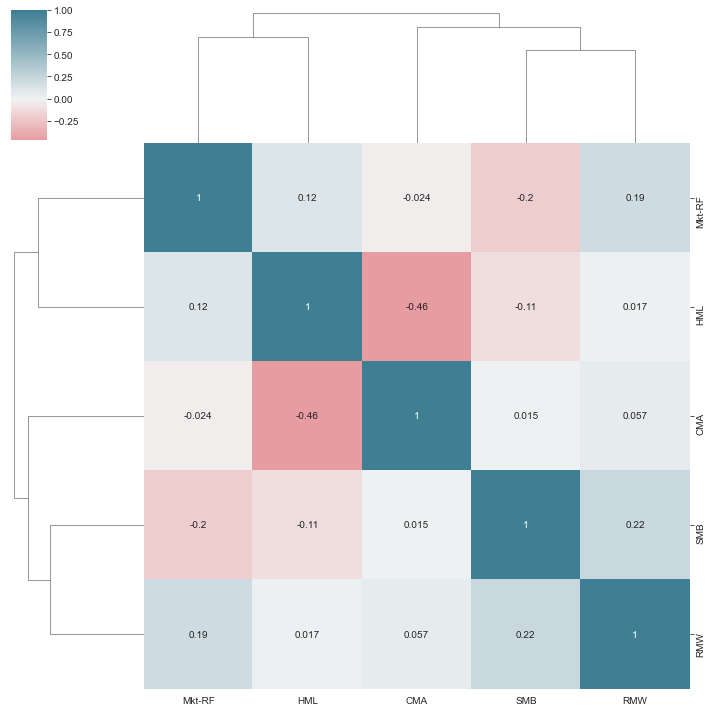

In [38]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.clustermap(betas.corr(), annot=True, cmap=cmap, center=0);

In [39]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
...                      ...        ...        ...        ...        ...   
ZUMZ   2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   
       2018-03-31   0.197970   0.066466   0.042579   0.045215   0.074606   

                   return_12m  
ticker date                    
A      2001-01-31   -0.015988  
       2001-02-28   -0.084537  
       2001-03-31   -0.096606  
       2001-04-30   -0.066102  
       2001-05-31   -0.063425  
...                       ...  
ZUMZ   2017-11-30   -0.010687  
       2017-12-31   -0.003996  
       2018-01-31    0.002864  
       2018-02-28   -0.002905  
       2018-03-31    0.021422  

[360752 rows x 6 columns]

In [40]:
data = (data.join(betas.groupby(level='ticker').shift()))

In [41]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
...                      ...        ...        ...        ...        ...   
ZUMZ   2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   
       2018-03-31   0.197970   0.066466   0.042579   0.045215   0.074606   

                   return_12m    Mkt-RF       SMB       HML       RMW  \
ticker date                                                             
A      2001-01-31   -0.015988       NaN       NaN       NaN       NaN   
       2001-02-28   -0.084537       NaN       NaN       NaN       NaN   
       2001-03-31   -0.096606       NaN       NaN       NaN       NaN   
       2001-04-30   -0.066102       NaN       NaN       NaN       NaN   
       2001-05-31   -0.063425       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
ZUMZ   2017-11-30   -0.010687 -0.781969  0.990484  1.404749  2.912727   
       2017-12-31   -0.003996 -0.783506  1.329358  1.363575  3.413242   
       2018-01-31    0.002864 -0.956662  1.647923  1.546264  3.586415   
       2018-02-28   -0.002905  0.102510  1.172206  1.323166  2.922154   
       2018-03-31    0.021422  0.376489  1.034578  1.356986  2.652526   

                        CMA  
ticker date                  
A      2001-01-31       NaN  
       2001-02-28       NaN  
       2001-03-31       NaN  
       2001-04-30       NaN  
       2001-05-31       NaN  
...                     ...  
ZUMZ   2017-11-30  1.137990  
       2017-12-31  0.870388  
       2018-01-31  0.264605  
       2018-02-28  0.556075  
       2018-03-31  0.570250  

[360752 rows x 11 columns]

In [42]:
data.loc[:, factors] = data.groupby('ticker')[factors].apply(lambda x: x.fillna(x.mean()))

In [43]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
...                      ...        ...        ...        ...        ...   
ZUMZ   2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   
       2018-03-31   0.197970   0.066466   0.042579   0.045215   0.074606   

                   return_12m    Mkt-RF       SMB       HML       RMW  \
ticker date                                                             
A      2001-01-31   -0.015988  1.279902  0.602331 -0.655264 -1.225707   
       2001-02-28   -0.084537  1.279902  0.602331 -0.655264 -1.225707   
       2001-03-31   -0.096606  1.279902  0.602331 -0.655264 -1.225707   
       2001-04-30   -0.066102  1.279902  0.602331 -0.655264 -1.225707   
       2001-05-31   -0.063425  1.279902  0.602331 -0.655264 -1.225707   
...                       ...       ...       ...       ...       ...   
ZUMZ   2017-11-30   -0.010687 -0.781969  0.990484  1.404749  2.912727   
       2017-12-31   -0.003996 -0.783506  1.329358  1.363575  3.413242   
       2018-01-31    0.002864 -0.956662  1.647923  1.546264  3.586415   
       2018-02-28   -0.002905  0.102510  1.172206  1.323166  2.922154   
       2018-03-31    0.021422  0.376489  1.034578  1.356986  2.652526   

                        CMA  
ticker date                  
A      2001-01-31  0.742945  
       2001-02-28  0.742945  
       2001-03-31  0.742945  
       2001-04-30  0.742945  
       2001-05-31  0.742945  
...                     ...  
ZUMZ   2017-11-30  1.137990  
       2017-12-31  0.870388  
       2018-01-31  0.264605  
       2018-02-28  0.556075  
       2018-03-31  0.570250  

[360752 rows x 11 columns]

In [44]:
for lag in [2,3,6,9,12]:
    data[f'momentum_{lag}'] = data[f'return_{lag}m'].sub(data.return_1m)
data[f'momentum_3_12'] = data[f'return_12m'].sub(data.return_3m)

In [45]:
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
...                      ...        ...        ...        ...        ...   
ZUMZ   2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   
       2018-03-31   0.197970   0.066466   0.042579   0.045215   0.074606   

                   return_12m    Mkt-RF       SMB       HML       RMW  \
ticker date                                                             
A      2001-01-31   -0.015988  1.279902  0.602331 -0.655264 -1.225707   
       2001-02-28   -0.084537  1.279902  0.602331 -0.655264 -1.225707   
       2001-03-31   -0.096606  1.279902  0.602331 -0.655264 -1.225707   
       2001-04-30   -0.066102  1.279902  0.602331 -0.655264 -1.225707   
       2001-05-31   -0.063425  1.279902  0.602331 -0.655264 -1.225707   
...                       ...       ...       ...       ...       ...   
ZUMZ   2017-11-30   -0.010687 -0.781969  0.990484  1.404749  2.912727   
       2017-12-31   -0.003996 -0.783506  1.329358  1.363575  3.413242   
       2018-01-31    0.002864 -0.956662  1.647923  1.546264  3.586415   
       2018-02-28   -0.002905  0.102510  1.172206  1.323166  2.922154   
       2018-03-31    0.021422  0.376489  1.034578  1.356986  2.652526   

                        CMA  momentum_2  momentum_3  momentum_6  momentum_9  \
ticker date                                                                   
A      2001-01-31  0.742945    0.026013    0.059757    0.053464   -0.048847   
       2001-02-28  0.742945    0.140448    0.213128    0.245423    0.253138   
       2001-03-31  0.742945   -0.103054   -0.028727    0.071761    0.053699   
       2001-04-30  0.742945   -0.228477   -0.375191   -0.297629   -0.274280   
       2001-05-31  0.742945    0.184941    0.116903    0.069178    0.075921   
...                     ...         ...         ...         ...         ...   
ZUMZ   2017-11-30  1.137990   -0.137667   -0.029826   -0.161698   -0.227725   
       2017-12-31  0.870388    0.130951    0.092582    0.135712    0.059190   
       2018-01-31  0.264605   -0.020778    0.059019    0.088866    0.019838   
       2018-02-28  0.556075    0.023217    0.017402    0.130086    0.087242   
       2018-03-31  0.570250   -0.131504   -0.155390   -0.152755   -0.123363   

                   momentum_12  momentum_3_12  
ticker date                                    
A      2001-01-31    -0.012335      -0.072092  
       2001-02-28     0.245026       0.031898  
       2001-03-31     0.049783       0.078511  
       2001-04-30    -0.335545       0.039645  
       2001-05-31     0.076795      -0.040108  
...                        ...            ...  
ZUMZ   2017-11-30    -0.245814      -0.215989  
       2017-12-31     0.040729      -0.051853  
       2018-01-31     0.006465      -0.052554  
       2018-02-28     0.047697       0.030295  
       2018-03-31    -0.176548      -0.021157  

[360752 rows x 17 columns]

In [46]:
dates = data.index.get_level_values('date')
data['year'] = dates.year
data['month'] = dates.month

In [48]:
for t in range(1, 7):
    data[f'return_1m_t-{t}'] = data.groupby(level='ticker').return_1m.shift(t)
data

return_1m  return_2m  return_3m  return_6m  return_9m  \
ticker date                                                                
A      2001-01-31  -0.003653   0.022360   0.056104   0.049811  -0.052500   
       2001-02-28  -0.329564  -0.189115  -0.116435  -0.084141  -0.076425   
       2001-03-31  -0.146389  -0.249443  -0.175116  -0.074628  -0.092690   
       2001-04-30   0.269444   0.040966  -0.105747  -0.028185  -0.004837   
       2001-05-31  -0.140220   0.044721  -0.023317  -0.071042  -0.064299   
...                      ...        ...        ...        ...        ...   
ZUMZ   2017-11-30   0.235127   0.097461   0.205302   0.073430   0.007402   
       2017-12-31  -0.044725   0.086226   0.047857   0.090987   0.014465   
       2018-01-31  -0.003601  -0.024380   0.055418   0.085265   0.016237   
       2018-02-28  -0.050602  -0.027386  -0.033200   0.079484   0.036640   
       2018-03-31   0.197970   0.066466   0.042579   0.045215   0.074606   

                   return_12m    Mkt-RF       SMB       HML       RMW  ...  \
ticker date                                                            ...   
A      2001-01-31   -0.015988  1.279902  0.602331 -0.655264 -1.225707  ...   
       2001-02-28   -0.084537  1.279902  0.602331 -0.655264 -1.225707  ...   
       2001-03-31   -0.096606  1.279902  0.602331 -0.655264 -1.225707  ...   
       2001-04-30   -0.066102  1.279902  0.602331 -0.655264 -1.225707  ...   
       2001-05-31   -0.063425  1.279902  0.602331 -0.655264 -1.225707  ...   
...                       ...       ...       ...       ...       ...  ...   
ZUMZ   2017-11-30   -0.010687 -0.781969  0.990484  1.404749  2.912727  ...   
       2017-12-31   -0.003996 -0.783506  1.329358  1.363575  3.413242  ...   
       2018-01-31    0.002864 -0.956662  1.647923  1.546264  3.586415  ...   
       2018-02-28   -0.002905  0.102510  1.172206  1.323166  2.922154  ...   
       2018-03-31    0.021422  0.376489  1.034578  1.356986  2.652526  ...   

                   momentum_12  momentum_3_12  year  month  return_1m_t-1  \
ticker date                                                                 
A      2001-01-31    -0.012335      -0.072092  2001      1            NaN   
       2001-02-28     0.245026       0.031898  2001      2      -0.003653   
       2001-03-31     0.049783       0.078511  2001      3      -0.329564   
       2001-04-30    -0.335545       0.039645  2001      4      -0.146389   
       2001-05-31     0.076795      -0.040108  2001      5       0.269444   
...                        ...            ...   ...    ...            ...   
ZUMZ   2017-11-30    -0.245814      -0.215989  2017     11      -0.024862   
       2017-12-31     0.040729      -0.051853  2017     12       0.235127   
       2018-01-31     0.006465      -0.052554  2018      1      -0.044725   
       2018-02-28     0.047697       0.030295  2018      2      -0.003601   
       2018-03-31    -0.176548      -0.021157  2018      3      -0.050602   

                   return_1m_t-2  return_1m_t-3  return_1m_t-4  return_1m_t-5  \
ticker date                                                                     
A      2001-01-31            NaN            NaN            NaN            NaN   
       2001-02-28            NaN            NaN            NaN            NaN   
       2001-03-31      -0.003653            NaN            NaN            NaN   
       2001-04-30      -0.329564      -0.003653            NaN            NaN   
       2001-05-31      -0.146389      -0.329564      -0.003653            NaN   
...                          ...            ...            ...            ...   
ZUMZ   2017-11-30       0.430943      -0.019685       0.028340      -0.133333   
       2017-12-31      -0.024862       0.430943      -0.019685       0.028340   
       2018-01-31       0.235127      -0.024862       0.430943      -0.019685   
       2018-02-28      -0.044725       0.235127      -0.024862       0.430943   
       2018-03-31      -0.003601      -0.

In [49]:
for t in [1,2,3,6,12]:
    data[f'target_{t}m'] = data.groupby(level='ticker')[f'return_{t}m'].shift(-t)

In [50]:
cols = ['target_1m',
        'target_2m',
        'target_3m', 
        'return_1m',
        'return_2m',
        'return_3m',
        'return_1m_t-1',
        'return_1m_t-2',
        'return_1m_t-3']

data[cols].dropna().sort_index().head(10)

target_1m  target_2m  target_3m  return_1m  return_2m  \
ticker date                                                                
A      2001-04-30  -0.140220  -0.087246  -0.098192   0.269444   0.040966   
       2001-05-31  -0.031008  -0.076414  -0.075527  -0.140220   0.044721   
       2001-06-30  -0.119692  -0.097014  -0.155847  -0.031008  -0.087246   
       2001-07-31  -0.073750  -0.173364  -0.080114  -0.119692  -0.076414   
       2001-08-31  -0.262264  -0.083279   0.009593  -0.073750  -0.097014   
       2001-09-30   0.139130   0.181052   0.134010  -0.262264  -0.173364   
       2001-10-31   0.224517   0.131458   0.108697   0.139130  -0.083279   
       2001-11-30   0.045471   0.054962   0.045340   0.224517   0.181052   
       2001-12-31   0.064539   0.045275   0.070347   0.045471   0.131458   
       2002-01-31   0.026359   0.073264  -0.003306   0.064539   0.054962   

                   return_3m  return_1m_t-1  return_1m_t-2  return_1m_t-3  
ticker date                                                                
A      2001-04-30  -0.105747      -0.146389      -0.329564      -0.003653  
       2001-05-31  -0.023317       0.269444      -0.146389      -0.329564  
       2001-06-30   0.018842      -0.140220       0.269444      -0.146389  
       2001-07-31  -0.098192      -0.031008      -0.140220       0.269444  
       2001-08-31  -0.075527      -0.119692      -0.031008      -0.140220  
       2001-09-30  -0.155847      -0.073750      -0.119692      -0.031008  
       2001-10-31  -0.080114      -0.262264      -0.073750      -0.119692  
       2001-11-30   0.009593       0.139130      -0.262264      -0.073750  
       2001-12-31   0.134010       0.224517       0.139130      -0.262264  
       2002-01-31   0.108697       0.045471       0.224517       0.139130

In [51]:
data = (data
        .join(pd.qcut(stocks.ipoyear, q=5, labels=list(range(1, 6)))
              .astype(float)
              .fillna(0)
              .astype(int)
              .to_frame('age')))
data.age = data.age.fillna(-1)

In [52]:
size_factor = (monthly_prices
               .loc[data.index.get_level_values('date').unique(),
                    data.index.get_level_values('ticker').unique()]
               .sort_index(ascending=False)
               .pct_change()
               .fillna(0)
               .add(1)
               .cumprod())
size_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2018-03-31 to 2001-01-31
Columns: 1838 entries, A to ZUMZ
dtypes: float64(1838)
memory usage: 2.9 MB


In [53]:
msize = (size_factor
         .mul(stocks
              .loc[size_factor.columns, 'marketcap'])).dropna(axis=1, how='all')

In [54]:
data['msize'] = (msize
                 .apply(lambda x: pd.qcut(x, q=10, labels=list(range(1, 11)))
                        .astype(int), axis=1)
                 .stack()
                 .swaplevel())
data.msize = data.msize.fillna(-1)

In [55]:
data = data.join(stocks[['sector']])
data.sector = data.sector.fillna('Unknown')

In [56]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('engineered_features', data.sort_index().loc[idx[:, :datetime(2018, 3, 1)], :])
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: C:/Users/86155/Machine Learning for Algorithmic Trading/data/assets.h5
/engineered_features            frame        (shape->[358914,33])  
/quandl/wiki/prices             frame        (shape->[15389314,12])
/quandl/wiki/stocks             frame        (shape->[1,2])        
/sp500/fred                     frame        (shape->[2609,1])     
/us_equities/stocks             frame        (shape->[6834,6])     


In [57]:

dummy_data = pd.get_dummies(data,
                            columns=['year','month', 'msize', 'age',  'sector'],
                            prefix=['year','month', 'msize', 'age', ''],
                            prefix_sep=['_', '_', '_', '_', ''])
dummy_data = dummy_data.rename(columns={c:c.replace('.0', '') for c in dummy_data.columns})
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360752 entries, ('A', Timestamp('2001-01-31 00:00:00', freq='M')) to ('ZUMZ', Timestamp('2018-03-31 00:00:00', freq='M'))
Data columns (total 88 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   return_1m              360752 non-null  float64
 1   return_2m              360752 non-null  float64
 2   return_3m              360752 non-null  float64
 3   return_6m              360752 non-null  float64
 4   return_9m              360752 non-null  float64
 5   return_12m             360752 non-null  float64
 6   Mkt-RF                 360752 non-null  float64
 7   SMB                    360752 non-null  float64
 8   HML                    360752 non-null  float64
 9   RMW                    360752 non-null  float64
 10  CMA                    360752 non-null  float64
 11  momentum_2             360752 non-null  float64
 12  momentum_3             360752 non-null  float64
